# UNICEF Project

Цель проекта - выявить влияние условий жизни учащихся на их успеваемость по математике. Задачи проекта - обработать набор данных по учащимся, выявить корреляцию между факторами условий жизни учащихся и их оценкой за экзамен по математике, отобрать параметры будущей модели для прогнозирования результатов экзамена.

В датафрейме приведены параметры условий жизни учащихся и их оценка за экзамен по математике. Присутствуют незаполненные ячейки и выбросы в числовых данных.

# Проанализируем колонки с числовыми данными на выбросы

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

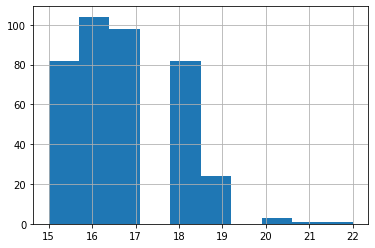

In [1]:
# смотрим на распределение признака для числовых перменных
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
stud.age.hist()
stud.age.describe()  # есть выбросы

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [15.0, 19.0].


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

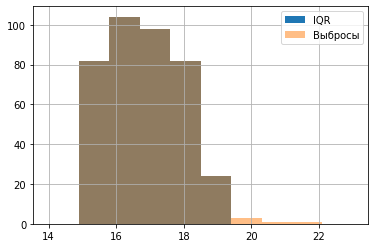

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')

#определим интерквартильное расстояние
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 0.5*IQR, l=perc75 + 0.5*IQR))

stud.age.loc[stud.age.between(
    perc25 - 0.5*IQR,
    perc75 + 0.5*IQR)].hist(bins=10, range=(14, 23), label='IQR')

stud.age.loc[stud.age <= 25].hist(
    alpha=0.5, bins=10, range=(14, 23), label='Выбросы')

plt.legend()
stud.age.describe()  # 20-22 года - выбросы, уберем их позже: stud = stud.loc[stud.age <= 19]

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

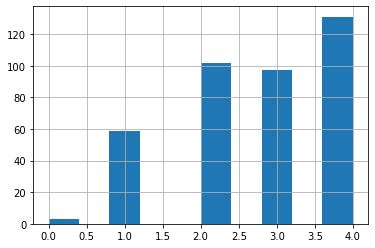

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
stud.Medu.hist()
stud.Medu.describe()  # нет выбросов

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

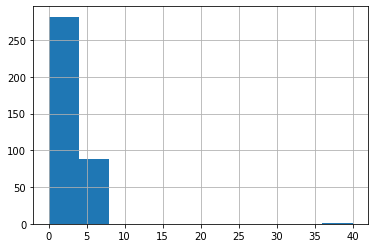

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
stud.Fedu.hist()
stud.Fedu.describe()  # есть выброс, максимальная оценка = 4, нужно будет убрать его: stud = stud.loc(stud.Fedu <=4)
stud.Fedu.value_counts()

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

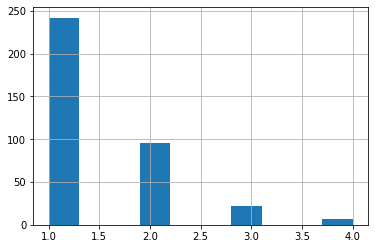

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
stud.traveltime.hist()
stud.traveltime.describe()  # нет выбросов
# stud.traveltime.value_counts()

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

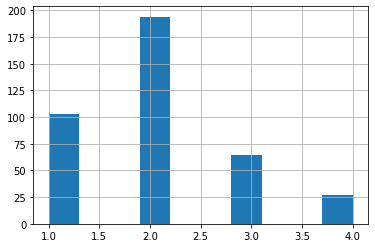

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
stud.studytime.hist()
stud.studytime.describe()  # нет выбросов

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

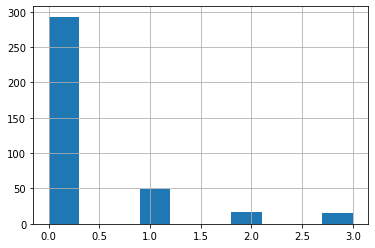

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
stud.failures.hist()
stud.failures.value_counts()  # нет выбросов

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

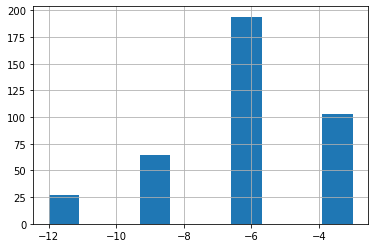

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
stud['studytime, granular'].hist()
stud['studytime, granular'].value_counts()  # нужно удалить столбец (его нет в описании и позже мы увидим, что он коррелирует с studytime)

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

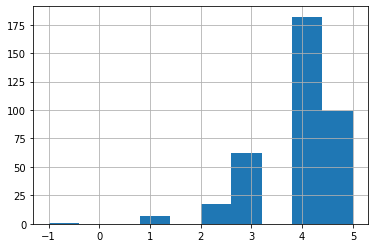

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
stud['famrel'].hist() # есть выброс, это ошибка, оценка может быть в пределах от 1 до 5, нужно будет убрать выброс: stud = stud.loc(stud.Fedu >=1)
stud['famrel'].value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

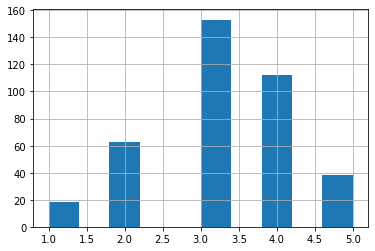

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
stud['freetime'].hist()
stud['freetime'].value_counts()  # нет выбросов

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

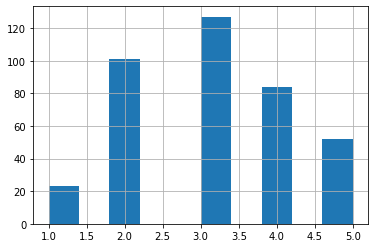

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
stud['goout'].hist()
stud['goout'].value_counts()  # нет выбросов

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

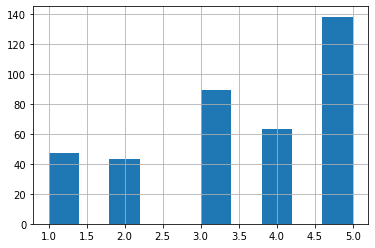

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
stud['health'].hist()
stud['health'].value_counts()  # нет выбросов

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-32.0, 40.0].


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

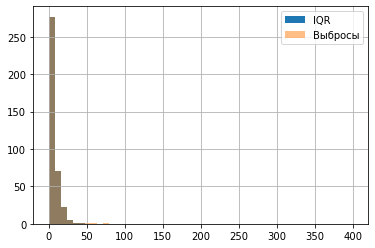

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 4*IQR, l=perc75 + 4*IQR))

stud.absences.loc[stud.absences.between(
    perc25 - 4*IQR,
    perc75 + 4*IQR)].hist(bins=50, range=(0, 400), label='IQR')

stud.absences.loc[stud.absences <= 100].hist(
    alpha=0.5, bins=50, range=(0, 400), label='Выбросы')

plt.legend()
stud.absences.describe()
# stud = stud.loc(stud.absences <= 40) уберем выбросы на основе межквартильного расстояния

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

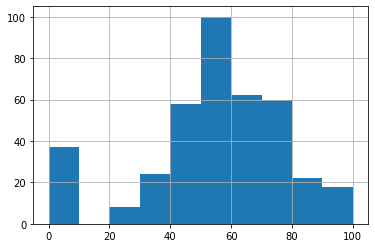

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')
stud['score'].hist()
# 0 оценка - странная, анализируем только область нормального распределения без нулевых оценок: stud = stud.loc(stud.score > 0), корреляция нулевых оценок с другими параметрами жизни невозможна, необходимо уточнить причину нулевых оценок
stud['score'].value_counts()

# Убираем выбросы из числовых данных, анализируем их корреляцию

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')

# убираем все численные выбросы
stud = stud.loc[stud.age <= 19]
stud = stud.loc[stud.Fedu <= 4]
stud.drop(['studytime, granular'], inplace=True, axis=1)
stud = stud.loc[stud.absences <= 40]
stud = stud.loc[stud.score > 0]

# корреляционный анализ количественных данных

stud.corr()

# не коррелируют

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.132243,-0.085731,0.122348,0.038579,0.125652,0.003417,-0.081685,0.091982,-0.012660,0.255497,-0.154989
Medu,-0.132243,1.000000,0.624841,-0.191246,0.066465,-0.216101,-0.003372,0.000119,0.054337,-0.064545,0.068474,0.190482
Fedu,-0.085731,0.624841,1.000000,-0.159700,-0.041527,-0.244653,0.000070,-0.016072,0.042403,0.008250,0.040649,0.124019
traveltime,0.122348,-0.191246,-0.159700,1.000000,-0.121140,0.107557,-0.037403,0.007844,0.029400,0.017374,-0.010565,-0.087754
studytime,0.038579,0.066465,-0.041527,-0.121140,1.000000,-0.128723,0.069935,-0.107715,-0.014225,-0.092575,-0.073081,0.148131
failures,0.125652,-0.216101,-0.244653,0.107557,-0.128723,1.000000,-0.074453,0.064996,0.090054,0.111656,0.214720,-0.284255
famrel,0.003417,-0.003372,0.000070,-0.037403,0.069935,-0.074453,1.000000,0.145691,0.048743,0.111682,-0.103090,0.068899
freetime,-0.081685,0.000119,-0.016072,0.007844,-0.107715,0.064996,0.145691,1.000000,0.261543,0.079880,-0.037603,-0.020801
goout,0.091982,0.054337,0.042403,0.029400,-0.014225,0.090054,0.048743,0.261543,1.000000,0.042211,0.086378,-0.209494
health,-0.012660,-0.064545,0.008250,0.017374,-0.092575,0.111656,0.111682,0.079880,0.042211,1.000000,-0.028114,-0.069608


Можно сделать вывод, что возраст, неудачи вне школы, количество проведенного времени с друзьями, количество пропущенных занятий негативно влияют на итоговую оценку.
При этом образование родителей и время на учебу вне школы положительно влияют на набранный балл. Рассмотрим эти предположения на графиках:

# Взаимосвязь числовых данных и итоговой оценки

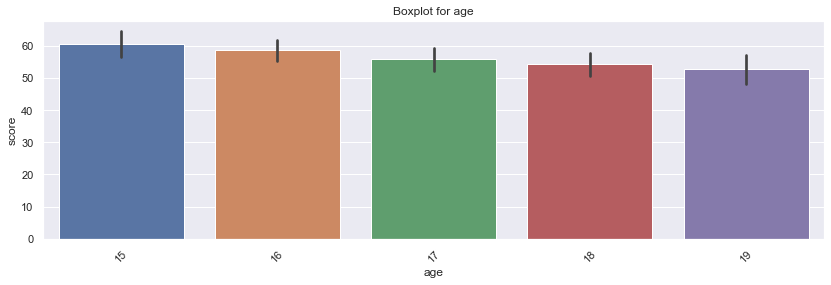

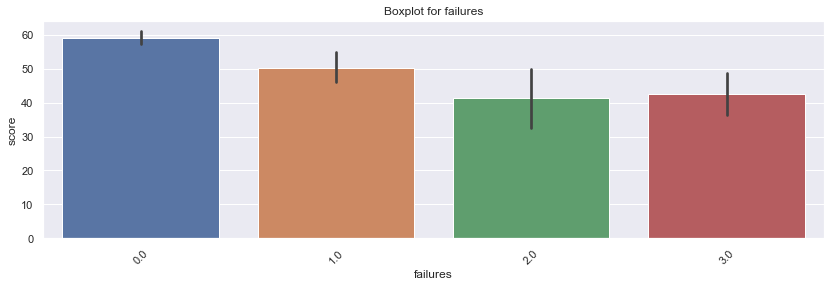

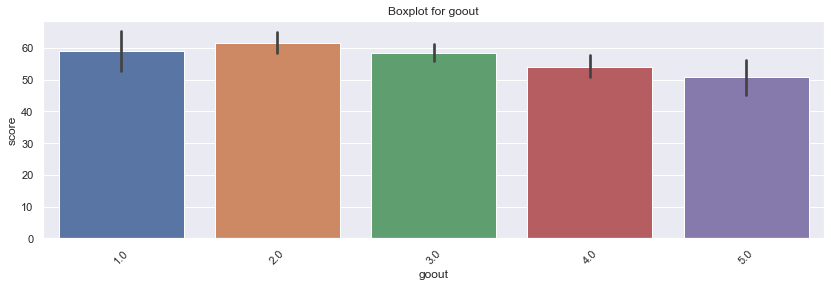

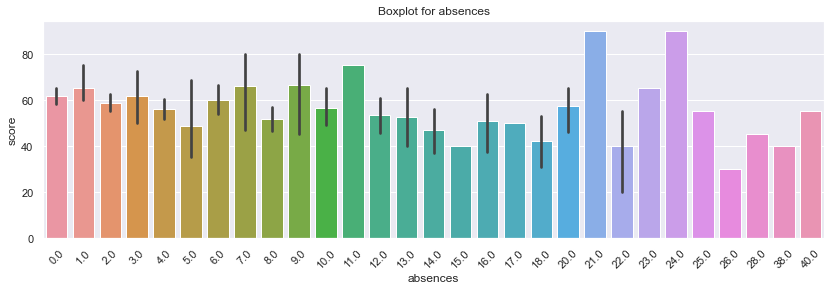

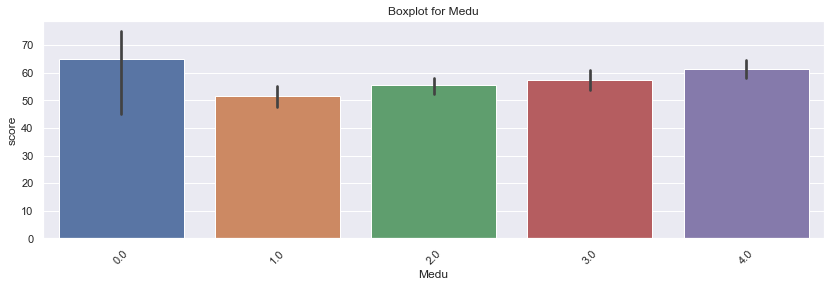

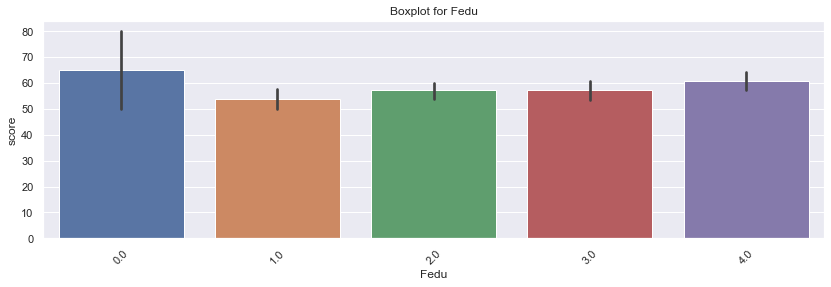

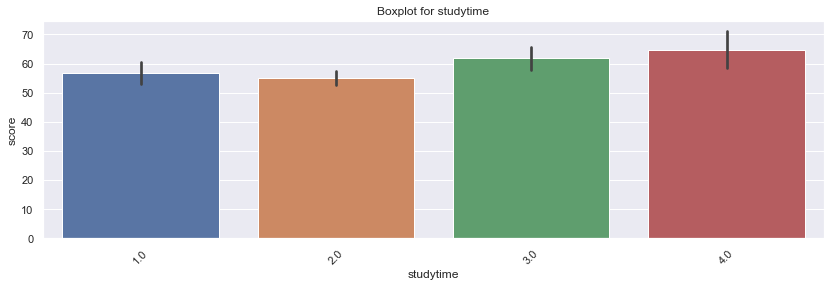

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')

# убираем все численные выбросы
stud = stud.loc[stud.age <= 19]
stud = stud.loc[stud.Fedu <= 4]
stud.drop(['studytime, granular'], inplace=True, axis=1)
stud = stud.loc[stud.absences <= 40]
stud = stud.loc[stud.score > 0]

def get_barplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.barplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:50])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in ['age', 'failures', 'goout','absences', 'Medu','Fedu','studytime']:
    get_barplot(col)
    

Можно сделать вывод, что выводы, сделанные ранее, верны. Интересным является факт, что отсутствие образование у родителей (корреляция между образованием матери и отца 63%) положительно влияет на балл учащихся.

# Анализируем номинативные данные на предмет статистически значимых различий

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')

# убираем все численные выбросы
stud = stud.loc[stud.age <= 19]
stud = stud.loc[stud.Fedu <= 4]
stud.drop(['studytime, granular'], inplace=True, axis=1)
stud = stud.loc[stud.absences <= 40]
stud = stud.loc[stud.score > 0]

# Номинативные переменные влияющие на предсказываемую величину score


def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
                <= 0.075/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
            'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


# Построим Boxplots соотношения выявленных параметров и итоговой оценки

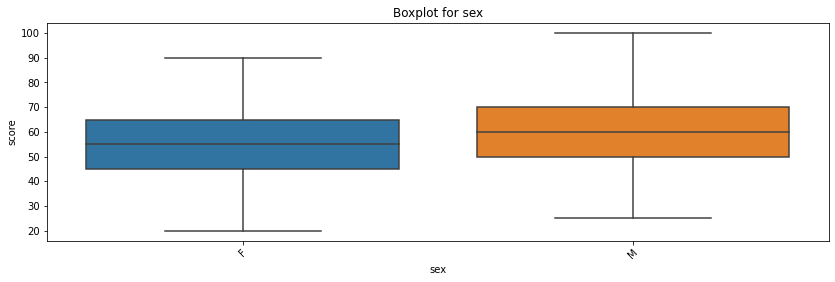

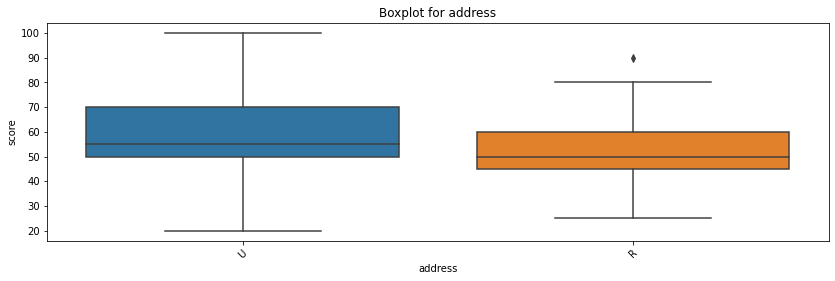

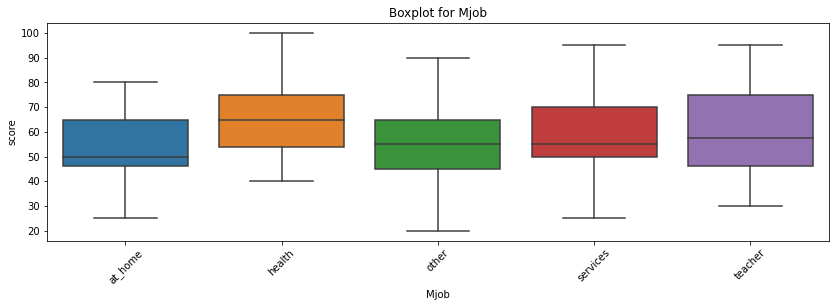

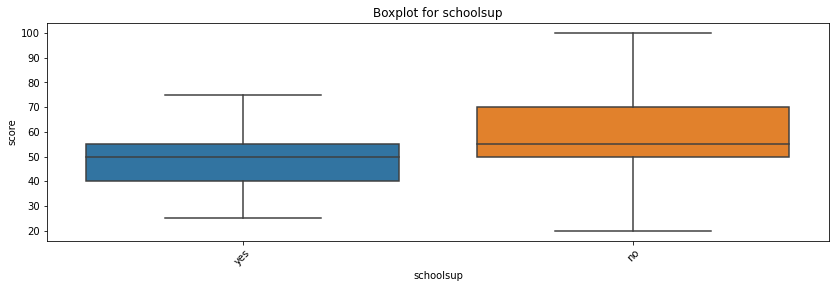

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')

# убираем все численные выбросы
stud = stud.loc[stud.age <= 19]
stud = stud.loc[stud.Fedu <= 4]
stud.drop(['studytime, granular'], inplace=True, axis=1)
stud = stud.loc[stud.absences <= 40]
stud = stud.loc[stud.score > 0]


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in ['sex', 'address', 'Mjob', 'schoolsup']:
    get_boxplot(col)

Из графиков выше можно сделать вывод, что в будущем построении модели необходимо уделить внимание полу учащихся, т.к. у мальчиков средние результаты лучше, чем у девочек; на место жительства учащихся, т.к. городские ученики набрали больший балл, чем живущие за городом; на профессию матери, т.к. дети учителей и врачей набрали большее количество баллов; на наличие дополнительной школьной поддержки, так как пародоксально, но при ее отсутствии ученики набрали большее количество баллов.

# Попытка проверки нулевых оценок

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('C:\Games/stud_math.csv')

# фильтруем датафрейм только по нулевым оценкам
stud = stud.loc[stud.score == 0]
stud.corr()
#нет данных по оценкам и пропускам занятий, функция статистически значимых различий номинативных данных не работает, необходимо выяснить причину нулевых оценок в датафрейме.

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.277001,-0.308023,-0.173553,-0.043985,-0.062840,0.043985,-0.013915,0.189722,0.090751,-0.224359,NaN,NaN
Medu,-0.277001,1.000000,0.763420,-0.139369,0.138471,-0.314499,-0.138471,-0.053375,0.178854,0.024078,-0.104942,NaN,NaN
Fedu,-0.308023,0.763420,1.000000,0.013349,0.243154,-0.257808,-0.243154,-0.038095,0.108777,0.126071,0.040732,NaN,NaN
traveltime,-0.173553,-0.139369,0.013349,1.000000,-0.141737,-0.247421,0.141737,-0.061199,-0.067848,0.046303,-0.144564,NaN,NaN
studytime,-0.043985,0.138471,0.243154,-0.141737,1.000000,-0.345101,-1.000000,-0.099838,-0.102243,-0.223221,-0.000755,NaN,NaN
failures,-0.062840,-0.314499,-0.257808,-0.247421,-0.345101,1.000000,0.345101,-0.136602,0.004118,0.031227,0.199496,NaN,NaN
"studytime, granular",0.043985,-0.138471,-0.243154,0.141737,-1.000000,0.345101,1.000000,0.099838,0.102243,0.223221,0.000755,NaN,NaN
famrel,-0.013915,-0.053375,-0.038095,-0.061199,-0.099838,-0.136602,0.099838,1.000000,0.279762,0.271268,-0.068486,NaN,NaN
freetime,0.189722,0.178854,0.108777,-0.067848,-0.102243,0.004118,0.102243,0.279762,1.000000,0.319699,-0.017763,NaN,NaN
goout,0.090751,0.024078,0.126071,0.046303,-0.223221,0.031227,0.223221,0.271268,0.319699,1.000000,-0.093742,NaN,NaN


# Итоговый вывод

Возраст (чем старше, тем хуже результат), количество неудач вне школы, продолжительность времени, проведенного с друзьями, количество пропущенных занятий, негативно влияют на успеваемость учеников.
Продолжительность времени, посвященного учебе вне школы; образование родителей, жизнь в городе, профессия матери учитель или врач позитивно влияют на успеваемость учеников.
Также наблюдается пародоксальная и интересная зависимость: отсутствие образования у родителей позитивно повлияло на набранный балл, отсутствие школьной поддержки также позитивно влияет на успеваемость учеников.
    *Необходимо проверить данные около 40 учеников с нулевыми оценками и отсутствием данных о пропущенных занятиях.